In [1]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

#-------------- Legend ---------------

sigma_x = 3.
sigma_z = 3.
r_a = 0.01 #radius of the satellite
r_lower = 0
r_upper = r_a
theta_lower = 0
theta_upper = 2*np.pi

prefactor = 0.

earth_r = 6371
orbit_height = 500
orbit_r = (earth_r + orbit_height)*10**3
G = 6.67408 * 10**-11  # Gravitational constant
M = 5.972 * 10**24     # Mass of the Earth
T = np.sqrt(4*np.pi**2 * orbit_r**3 / (G*M)) # orbit period
N = 1000 # number of satellites in the cluster
S = 2*np.pi*orbit_r / N  # spacing between the satellites in the cluster
N_orb_per_day = 24*3600/T
#-------------------------------------

print(T)

    
def prob_collision(x_e,phi):
    # Integrand of the integral for the probability
    def P(r,theta):
  
      return r * np.exp(-0.5*r**2 * ((np.sin(theta) / sigma_x)**2 + (np.cos(theta) / sigma_z)**2 ) + r*x_e * ( (np.sin(phi) * np.sin(theta)/ sigma_x**2) + (np.cos(phi) * np.cos(theta) / sigma_z**2) ) )
    
    prefactor = np.exp(-0.5 * x_e**2 * ( (np.sin(phi) / sigma_x)**2 + (np.cos(phi) / sigma_z)**2 ) )/(2*np.pi * sigma_x * sigma_z)
    temp = prefactor * integrate.dblquad(P, r_lower, r_a, theta_lower, theta_upper)[0]
    return temp

5668.31775008775


In [2]:
def probability_col_N_iters(Xe_init, phi_init, N):  # expected values of closest distance and angle between the two satellites
    Xe = Xe_init
    phi = phi_init
    p_sur_N  = 1
    sigma_Xe = 0.550
    sigma_phi= np.pi*5/180 # radians
    for i in range(1,2*N+1):  # where N is the number of orbits (2 crossing points for each)
        p_col = prob_collision(Xe,phi)
        p_sur = 1 - p_col
        p_sur_N = p_sur_N * p_sur
        Xe = np.random.normal(Xe_init,sigma_Xe)
        phi = np.random.normal(phi_init,sigma_phi)
        
    return p_sur_N


In [3]:
def exp_num_orb_bef_crash(Xe_init, phi_init, Nmax):  # Expected number of Orbits before crash 
    Xe = Xe_init
    phi = phi_init
    p_sur_N  = 1
    sigma_Xe = 0.350
    sigma_phi= np.pi*0.1/180 # radians
    summ = 0
    for i in range(1,2*Nmax+1):  # where Nmax is the number of orbits (2 crossing points for each)
        p_col = prob_collision(Xe,phi)
        summ = summ + i * p_col * p_sur_N
        p_sur = 1 - p_col
        p_sur_N = p_sur_N * p_sur
        Xe = np.random.normal(Xe_init,sigma_Xe)
        phi = np.random.normal(phi_init,sigma_phi)
    return (summ/2)/ N_orb_per_day  # expected number of days before crash

Text(0, 0.5, 'Expected Day of Collision')

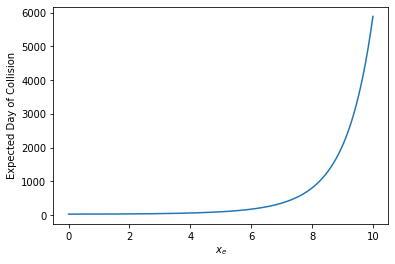

In [8]:
phi = np.pi/2
xxe = np.linspace(0, 10, 500)
p_list = np.zeros(np.size(xxe))
for i in range (np.size(xxe)):
    p = prob_collision(xxe[i],phi)
    p_list[i] = p
plt.plot(xxe,1/(p_list*2*N_orb_per_day))
plt.xlabel('$x_e$')
plt.ylabel('Expected Day of Collision')

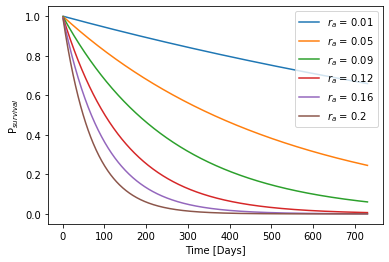

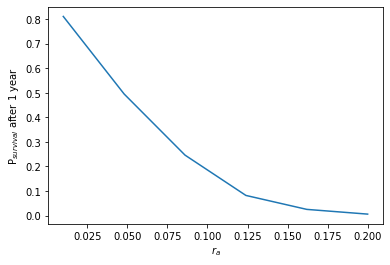

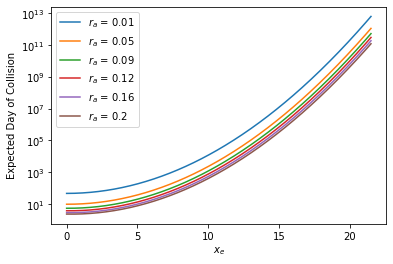

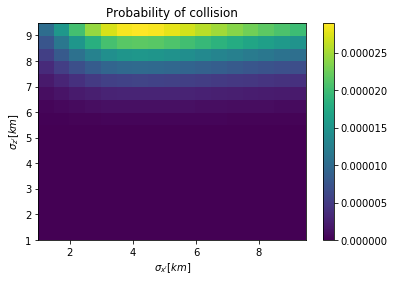

In [17]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

#-------------- Legend ---------------

# Parameters in probability of collision computation

sigma_xs = np.arange(1,10,0.5)
sigma_zs = np.arange(1,10,0.5)
sigma_x = 3.
sigma_z = 3.
phi = np.pi/2.
x_e = 0.584
x_es = np.linspace(0, 21.5, 500)
r_a = 0.01

prefactor = 0.

# Physical parameters of orbit of satellites

earth_r = 6371
orbit_height = 500
orbit_r = (earth_r + orbit_height)*10**3
G = 6.67408 * 10**-11  # Gravitational constant
M = 5.972 * 10**24     # Mass of the Earth
T = np.sqrt(4*np.pi**2 * orbit_r**3 / (G*M)) # orbit period
N = 1000 # number of satellites in the cluster
S = 2*np.pi*orbit_r / N  # spacing between the satellites in the cluster
N_orb_per_day = 24*3600/T
# --------- Set upper and lower bounds for double integral

r_lower = 0
#r_upper = r_a
theta_lower = 0
theta_upper = 2*np.pi

#-------------------------------------

# Integrand of the integral for the probability
def P(r,theta):
  
  return r * np.exp(-0.5*r**2 * ((np.sin(theta) / sigma_x)**2 + (np.cos(theta) / sigma_z)**2 ) + r*x_e * ( (np.sin(phi) * np.sin(theta)/ sigma_x**2) + (np.cos(phi) * np.cos(theta) / sigma_z**2) ) )
  
# Monte Carlo averaging for range [0,S/2]
# returns E(P | x_E ~ U([0,S/2]))
def prob_collision(r_upper):
  
  # -------- Monte Carlo sampling -----------
  
  n_samples = 10000
  x_e_samples = np.random.uniform(size=n_samples) * S/2.0
  temp = 0.
  
  # ---------- Monte Carlo Averaging ---------
  
  for i in range(n_samples):
  
    x_e = x_e_samples[i]
    prefactor = np.exp(-0.5 * x_e**2 * ( (np.sin(phi) / sigma_x)**2 + (np.cos(phi) / sigma_z)**2 ) )/(2*np.pi * sigma_x * sigma_z)
    temp += prefactor * integrate.dblquad(P, r_lower, r_upper, theta_lower, theta_upper)[0]
  
  return temp/n_samples

  
# Probability of expensive satellite not crashing for a full day

def p_survival_per_day(prob_collision):

  n_encounters_per_day = 72.0 * 2./(T / (60. * 60. * 24.) )
  
  p_survival_per_day = (1 - prob_collision) ** n_encounters_per_day

  return p_survival_per_day
  
# Probability of expensive satellite not crashing for a full year

def p_survival_per_year(p_survival_per_day):

  return p_survival_per_day ** 365.
  
# Return how probability of survival changes over time

def p_survival_time(prob_collision):

  n_encounters_per_day = 72.0 * 2./(T / (60. * 60. * 24.) )

  temp = np.zeros(730)
  temp[0] = (1.0-prob_collision) ** n_encounters_per_day
  for i in range(1,730):
    temp[i] = temp[i-1]*temp[0]
  return temp
  


# ----------- Code to create plot of P of survival with time for different r_as

r_as = np.linspace(0.01, 0.2, 6)
results = np.zeros_like(r_as)

probs = [2.603378895447041e-07, 8.766767906667571e-07, 1.7487943083133687e-06, 3.1217468772035935e-06, 4.597813217e-06, 6.418341528451043e-06]

for j, ra in enumerate(r_as):
  prob = probs[j]
  day = p_survival_per_day(prob)
  results[j] = p_survival_per_year(day)
  plt.plot(np.arange(1,731,1), p_survival_time(prob), label="$r_a$ = "+str(np.round(ra,2)))
  
plt.legend()
plt.xlabel("Time [Days]")
plt.ylabel("P$_{survival}$")
plt.show()
  

  
plt.plot(r_as, results)
plt.xlabel("$r_{a}$")
plt.ylabel("P$_{survival}$ after 1 year")
plt.show()




# ---------- Code to create plot of x_e and r_a

results = np.zeros((len(r_as), len(x_es)))
#n_encounters_per_day = 72.0 * 2./(T / (60. * 60. * 24.) )

for j, ra in enumerate(r_as):
  for i, elem in enumerate(x_es):
    x_e = elem
    prefactor = np.exp(-0.5 * x_e**2 * ( (np.sin(phi) / sigma_x)**2 + (np.cos(phi) / sigma_z)**2 ) )/(2*np.pi * sigma_x * sigma_z)
    prob = integrate.dblquad(P, r_lower, ra, theta_lower, theta_upper)[0]
    results[j,i] = 1/(prefactor * prob)
  
for j in range(len(r_as)):
  plt.plot(x_es, results[j]/N_orb_per_day, label="$r_a$ = "+str(np.round(r_as[j],2)))
plt.xlabel("$x_e$")
plt.yscale('log')
plt.ylabel("Expected Day of Collision")
plt.legend()
plt.show()


# Code of colourplot for sigma sensitivity

SX, SZ = np.meshgrid(sigma_xs, sigma_zs)

results = np.zeros_like(SX, dtype=float)

for i in range(len(sigma_xs)):
  for j in range(len(sigma_zs)):
    sigma_x = sigma_xs[i]
    sigma_z = sigma_zs[j]
    prefactor = np.exp(-0.5 * x_e**2 * ( (np.sin(phi) / sigma_x)**2 + (np.cos(phi) / sigma_z)**2 ) )/(2*np.pi * sigma_x * sigma_z)
    results[i][j] = prefactor * integrate.dblquad(P, r_lower, r_upper, theta_lower, theta_upper)[0]

plt.pcolormesh(SX, SZ, results)
plt.colorbar()
plt.ylabel("$\\sigma_{z'} [km]$")
plt.xlabel("$\\sigma_{x'} [km]$")
plt.title("Probability of collision")
plt.show()

#result = integrate.dblquad(P, r_lower, r_upper, theta_lower, theta_upper)
#print("Result : ", prefactor * result[0])
#print(" Numerical Error : ", result[1])






